In [5]:
!pip install rasterio
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import rasterio
from PIL import Image
from google.colab import drive

In [6]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Directories for GeoTIFF and label images
path_images = '/content/drive/MyDrive/DSML Capstone Project/images'  # Adjust the path according to your Google Drive structure
path_masks = '/content/drive/MyDrive/DSML Capstone Project/labels'  # Adjust the path according to your Google Drive structure

In [9]:
# Set the path to the images and labels directory and load the images and masks filenames
img_files = glob.glob(os.path.join(path_images, '*.tif'))
msk_files = glob.glob(os.path.join(path_masks, '*.png'))

print("number of images = ", len(img_files))

img_files.sort()
msk_files.sort()
print("img_files =", img_files)
print("msk_files =", msk_files)

number of images =  306
img_files = ['/content/drive/MyDrive/DSML Capstone Project/images/0.tif', '/content/drive/MyDrive/DSML Capstone Project/images/1.tif', '/content/drive/MyDrive/DSML Capstone Project/images/10.tif', '/content/drive/MyDrive/DSML Capstone Project/images/100.tif', '/content/drive/MyDrive/DSML Capstone Project/images/101.tif', '/content/drive/MyDrive/DSML Capstone Project/images/102.tif', '/content/drive/MyDrive/DSML Capstone Project/images/103.tif', '/content/drive/MyDrive/DSML Capstone Project/images/104.tif', '/content/drive/MyDrive/DSML Capstone Project/images/105.tif', '/content/drive/MyDrive/DSML Capstone Project/images/106.tif', '/content/drive/MyDrive/DSML Capstone Project/images/107.tif', '/content/drive/MyDrive/DSML Capstone Project/images/108.tif', '/content/drive/MyDrive/DSML Capstone Project/images/109.tif', '/content/drive/MyDrive/DSML Capstone Project/images/11.tif', '/content/drive/MyDrive/DSML Capstone Project/images/110.tif', '/content/drive/MyDrive/

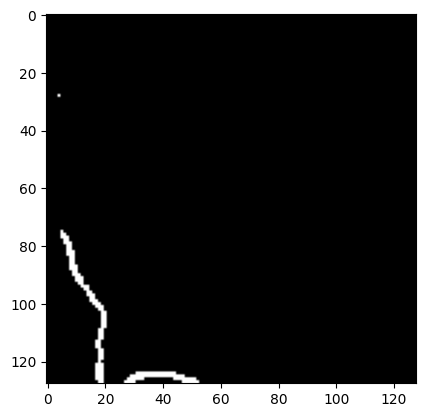

In [10]:
# plot the water mask
gray = cv2.imread(msk_files[1], cv2.IMREAD_UNCHANGED)
plt.imshow(gray,  cmap='gray')

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


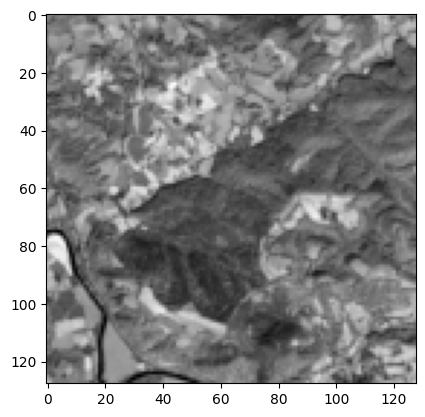

In [11]:
# plot the NIR band
img=rasterio.open(img_files[1]).read(5)
plt.imshow(img, cmap='gray')

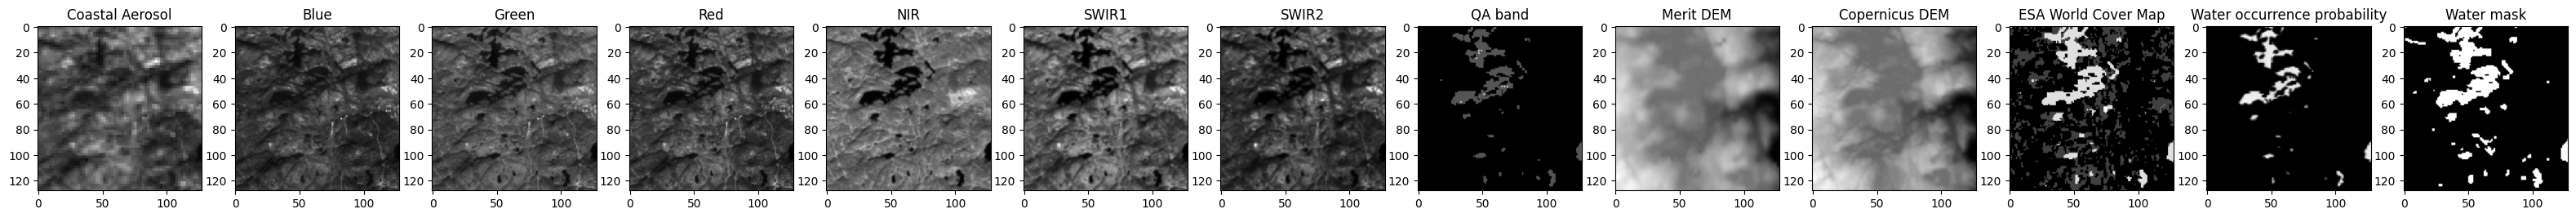

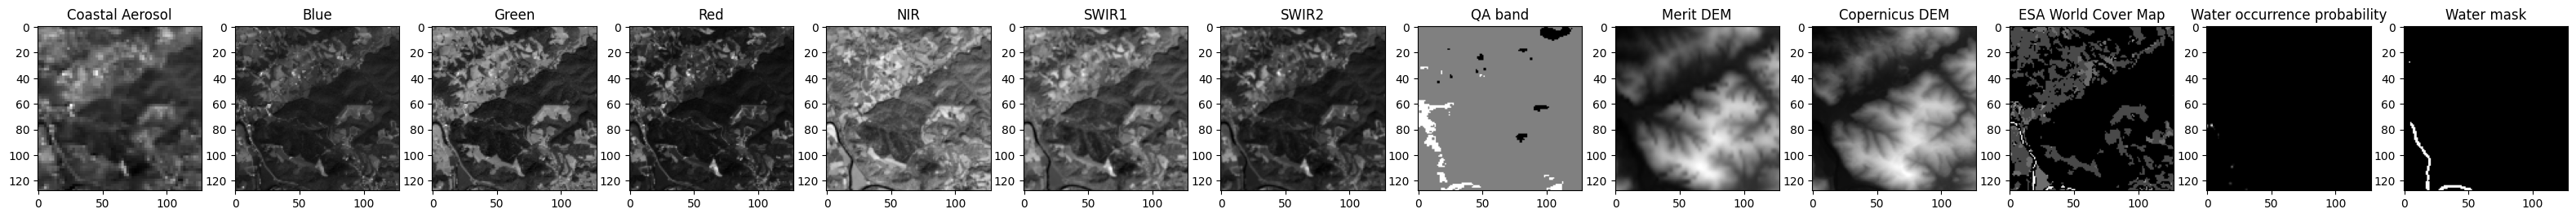

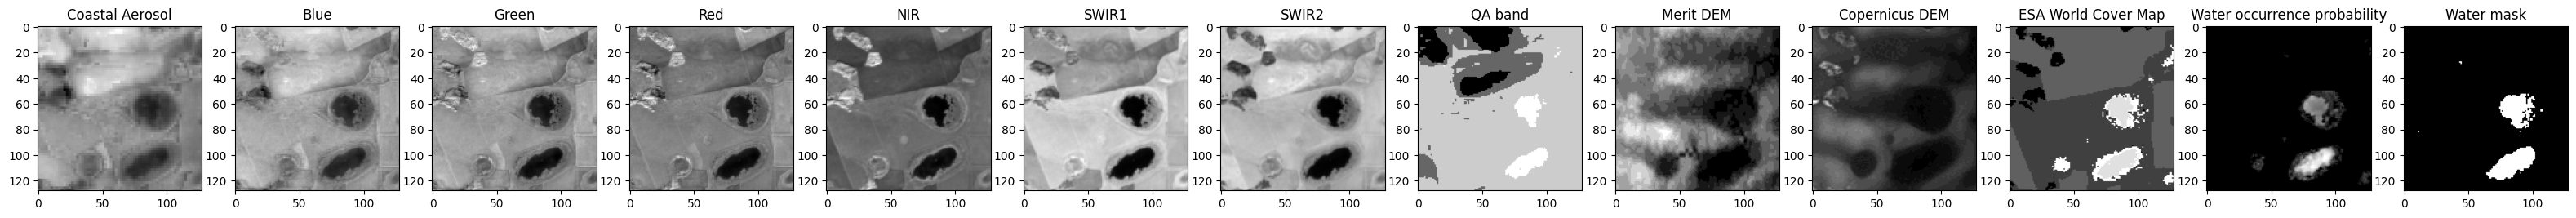

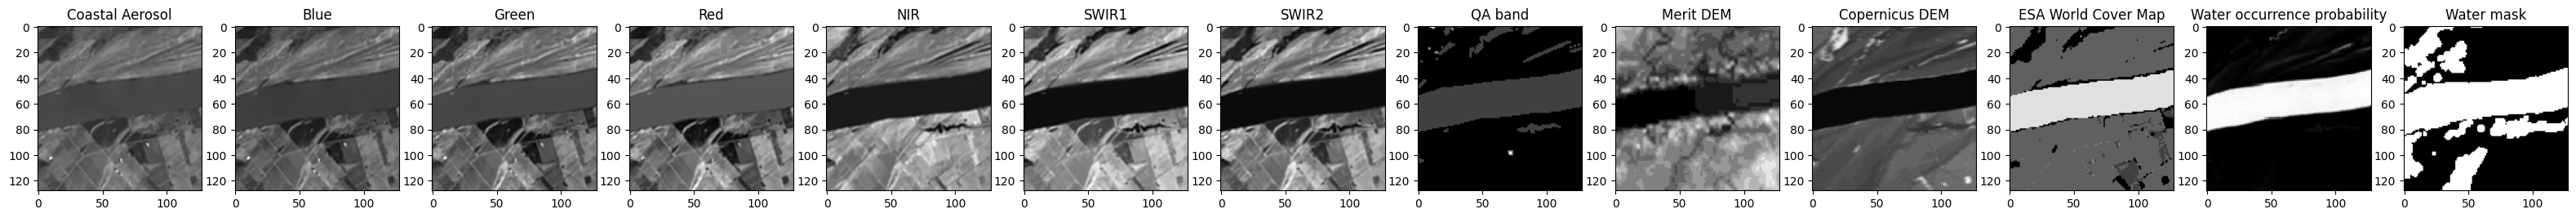

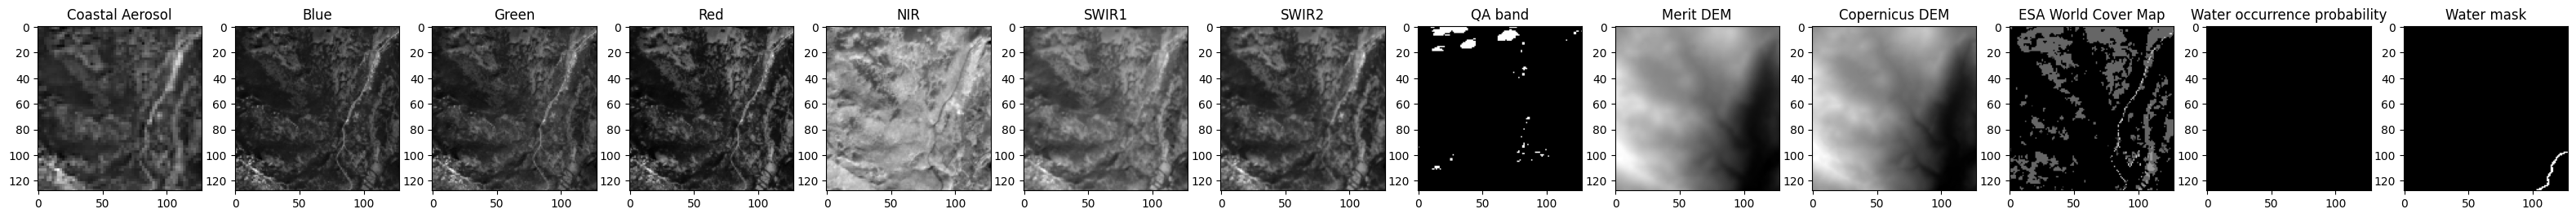

In [12]:
for i in range(5):  # Limit the loop to the first 5 images
    path_msk = msk_files[i]
    path_img = img_files[i]

    # Water mask (.png file)
    mask = cv2.imread(path_msk, cv2.IMREAD_UNCHANGED)

    # Spectral bands inside each .tif file
    img1 = rasterio.open(path_img).read(1)
    img2 = rasterio.open(path_img).read(2)
    img3 = rasterio.open(path_img).read(3)
    img4 = rasterio.open(path_img).read(4)
    img5 = rasterio.open(path_img).read(5)
    img6 = rasterio.open(path_img).read(6)
    img7 = rasterio.open(path_img).read(7)
    img8 = rasterio.open(path_img).read(8)
    img9 = rasterio.open(path_img).read(9)
    img10 = rasterio.open(path_img).read(10)
    img11 = rasterio.open(path_img).read(11)
    img12 = rasterio.open(path_img).read(12)

    fig, ax = plt.subplots(1, 13, figsize=(40, 20))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2,  cmap='gray')
    ax[2].imshow(img3,  cmap='gray')
    ax[3].imshow(img4,  cmap='gray')
    ax[4].imshow(img5,  cmap='gray')
    ax[5].imshow(img6,  cmap='gray')
    ax[6].imshow(img7,  cmap='gray')
    ax[7].imshow(img8,  cmap='gray')
    ax[8].imshow(img9,  cmap='gray')
    ax[9].imshow(img10,  cmap='gray')
    ax[10].imshow(img11,  cmap='gray')
    ax[11].imshow(img12,  cmap='gray')
    ax[12].imshow(mask,  cmap='gray')

    # Set a title for the figures
    ax[0].set_title('Coastal Aerosol')
    ax[1].set_title('Blue')
    ax[2].set_title('Green')
    ax[3].set_title('Red')
    ax[4].set_title('NIR')
    ax[5].set_title('SWIR1')
    ax[6].set_title('SWIR2')
    ax[7].set_title('QA band')
    ax[8].set_title('Merit DEM')
    ax[9].set_title('Copernicus DEM')
    ax[10].set_title('ESA World Cover Map')
    ax[11].set_title('Water occurrence probability')
    ax[12].set_title('Water mask')

    plt.show()


In [13]:
import os
import numpy as np
import tifffile
from PIL import Image  # Make sure to install Pillow: pip install pillow

# Set the directories for TIFF images and PNG masks
path_images = '/content/drive/MyDrive/DSML Capstone Project/images'
path_masks = '/content/drive/MyDrive/DSML Capstone Project/labels'

# List all TIFF and PNG files in the directories
tiff_files = sorted([os.path.join(path_images, f) for f in os.listdir(path_images) if f.endswith('.tif')])
png_files = sorted([os.path.join(path_masks, f) for f in os.listdir(path_masks) if f.endswith('.png')])

# Ensure that TIFF and PNG files are being loaded correctly
print(f"TIFF files: {tiff_files}")
print(f"PNG files: {png_files}")

# Initialize lists to store the flattened data
X = []
y = []

# Load and process each image-mask pair
for tiff_file, png_file in zip(tiff_files, png_files):
    # Load the TIFF image
    tiff_image = tifffile.imread(tiff_file)

    # Load the corresponding PNG mask
    png_mask = Image.open(png_file)
    png_mask = np.array(png_mask)

    # Flatten the TIFF image and mask
    X.append(tiff_image.reshape((-1, tiff_image.shape[2])))
    y.append(png_mask.flatten())

# Combine all the data into a single dataset
X = np.vstack(X)
y = np.hstack(y)

# Check the shape of X and y to ensure they are loaded correctly
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


TIFF files: ['/content/drive/MyDrive/DSML Capstone Project/images/0.tif', '/content/drive/MyDrive/DSML Capstone Project/images/1.tif', '/content/drive/MyDrive/DSML Capstone Project/images/10.tif', '/content/drive/MyDrive/DSML Capstone Project/images/100.tif', '/content/drive/MyDrive/DSML Capstone Project/images/101.tif', '/content/drive/MyDrive/DSML Capstone Project/images/102.tif', '/content/drive/MyDrive/DSML Capstone Project/images/103.tif', '/content/drive/MyDrive/DSML Capstone Project/images/104.tif', '/content/drive/MyDrive/DSML Capstone Project/images/105.tif', '/content/drive/MyDrive/DSML Capstone Project/images/106.tif', '/content/drive/MyDrive/DSML Capstone Project/images/107.tif', '/content/drive/MyDrive/DSML Capstone Project/images/108.tif', '/content/drive/MyDrive/DSML Capstone Project/images/109.tif', '/content/drive/MyDrive/DSML Capstone Project/images/11.tif', '/content/drive/MyDrive/DSML Capstone Project/images/110.tif', '/content/drive/MyDrive/DSML Capstone Project/im

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report  # Add classification_report import here

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9542741873286296
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97   1113094
           1       0.94      0.88      0.91    390958

    accuracy                           0.95   1504052
   macro avg       0.95      0.93      0.94   1504052
weighted avg       0.95      0.95      0.95   1504052



Visualize the Input Images and Masks

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


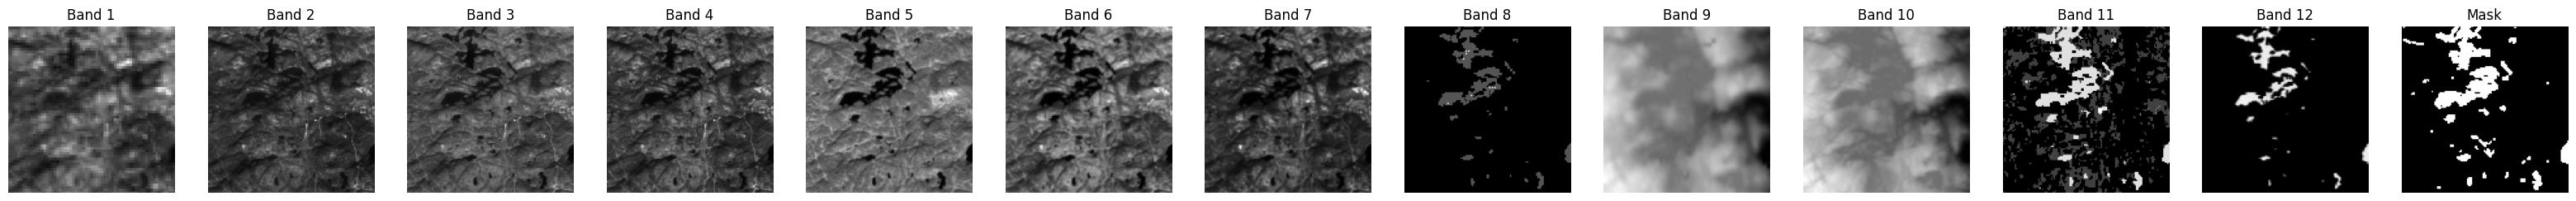

In [10]:
import matplotlib.pyplot as plt

def visualize_images_and_masks(img_files, msk_files, index=0):
    for i in range(index, index + 1):  # Adjust the range as needed
        path_msk = msk_files[i]
        path_img = img_files[i]

        # Water mask (.png file)
        mask = cv2.imread(path_msk, cv2.IMREAD_UNCHANGED)

        # Spectral bands inside each .tif file
        with rasterio.open(path_img) as src:
            bands = [src.read(i) for i in range(1, src.count + 1)]

        fig, ax = plt.subplots(1, len(bands) + 1, figsize=(40, 20))
        for idx, band in enumerate(bands):
            ax[idx].imshow(band, cmap='gray')
            ax[idx].set_title(f'Band {idx+1}')
            ax[idx].axis('off')
        ax[-1].imshow(mask, cmap='gray')
        ax[-1].set_title('Mask')
        ax[-1].axis('off')

        plt.show()

# Visualize the first image and mask pair
visualize_images_and_masks(img_files, msk_files, index=0)

Train and value accuracy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate and track accuracy
def track_accuracy(X_train, X_val, y_train, y_val, n_estimators_list):
    train_accuracies = []
    val_accuracies = []

    for n_estimators in n_estimators_list:
        model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
        model.fit(X_train, y_train)

        # Evaluate on training data
        y_train_pred = model.predict(X_train)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_accuracies.append(train_accuracy)

        # Evaluate on validation data
        y_val_pred = model.predict(X_val)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        val_accuracies.append(val_accuracy)

    return train_accuracies, val_accuracies

# Define the number of estimators to evaluate
n_estimators_list = [10, 50, 100, 200, 500]

# Track accuracies using previously split X_train and X_test (from earlier code)
train_accuracies, val_accuracies = track_accuracy(X_train, X_test, y_train, y_test, n_estimators_list)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_list, val_accuracies, label='Validation Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()


Plot Accuracy and Classification Report

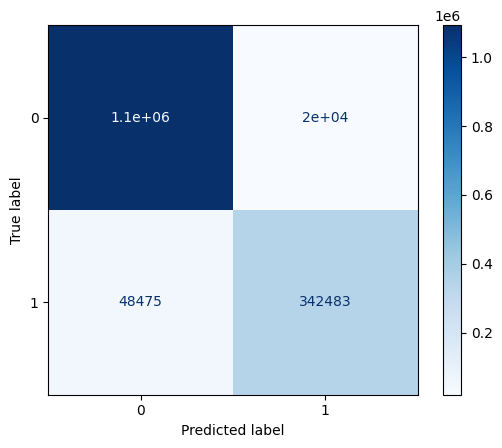

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

Choosing rgb as three inputs for the model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio

def extract_rgb_channels(tiff_file):
    with rasterio.open(tiff_file) as src:
        # Assuming the bands are ordered as (Blue, Green, Red) in the TIFF file
        blue = src.read(1)  # Blue channel
        green = src.read(2)  # Green channel
        red = src.read(3)  # Red channel

        # Normalize the bands to 0-1 range for display
        blue = blue / np.max(blue)
        green = green / np.max(green)
        red = red / np.max(red)

        # Stack the channels to create an RGB image
        rgb_image = np.stack([red, green, blue], axis=-1)
        return rgb_image

def visualize_rgb_images(img_files, num_samples=3):
    for i in range(min(num_samples, len(img_files))):
        rgb_image = extract_rgb_channels(img_files[i])

        plt.figure(figsize=(10, 10))
        plt.imshow(rgb_image)
        plt.title(f'RGB Composite Image {i+1}')
        plt.axis('off')
        plt.show()

# Example usage
visualize_rgb_images(img_files, num_samples=3)
